In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

In [5]:
## relplot

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


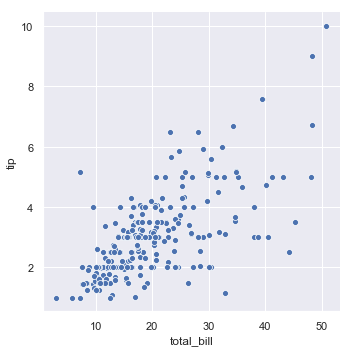

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips);

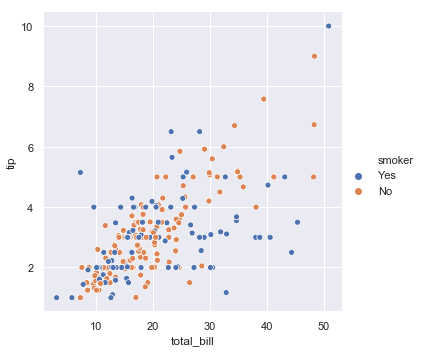

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

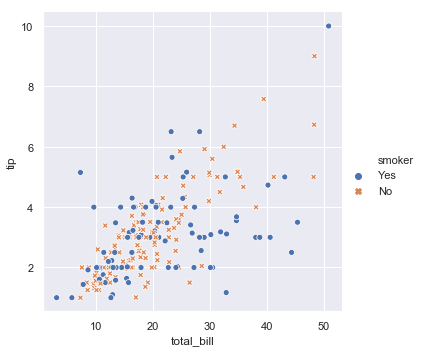

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

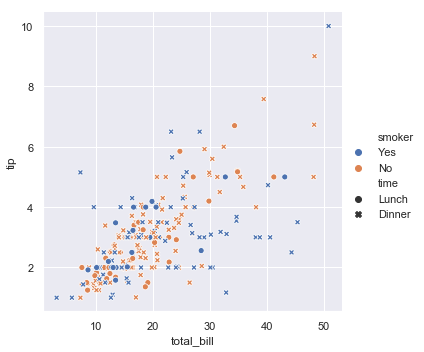

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

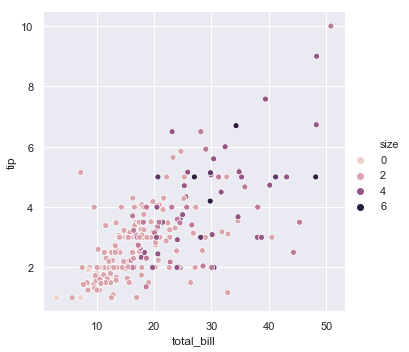

In [11]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

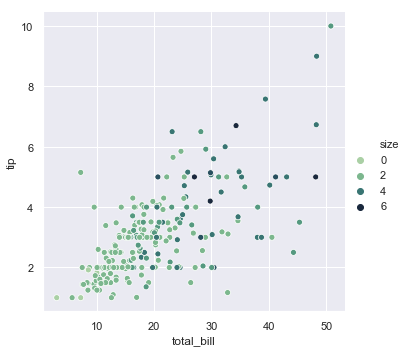

In [16]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

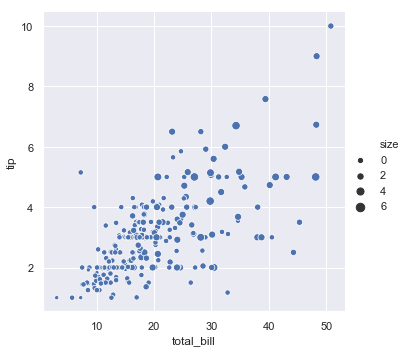

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

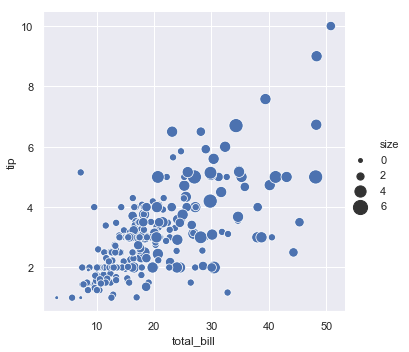

In [14]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

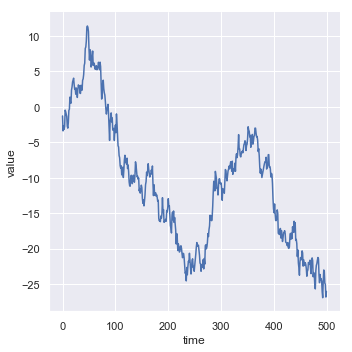

In [22]:
time = np.arange(500)
value = np.random.randn(500).cumsum()
df = pd.DataFrame(dict(time=time,
                       value=value))
g = sns.relplot(x="time", y="value", kind="line", data=df)

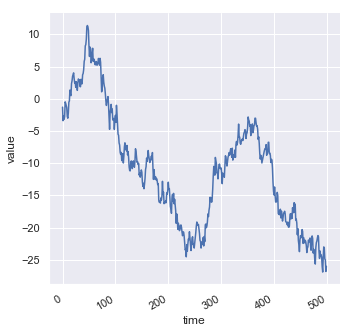

In [23]:
df = pd.DataFrame(dict(time=time,
                       value=value))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

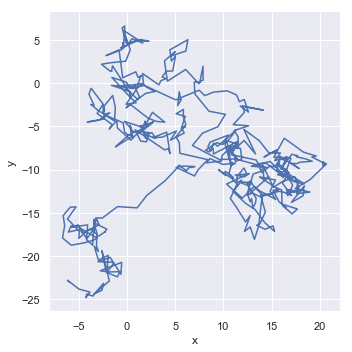

In [24]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

In [29]:
## Aggregation and representing uncertainty
fmri = sns.load_dataset("fmri")
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [30]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


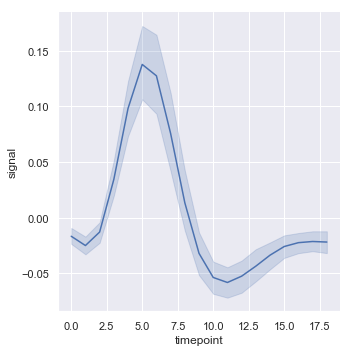

In [28]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

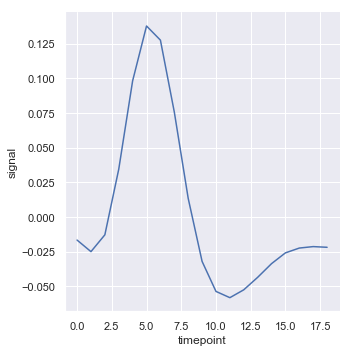

In [26]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

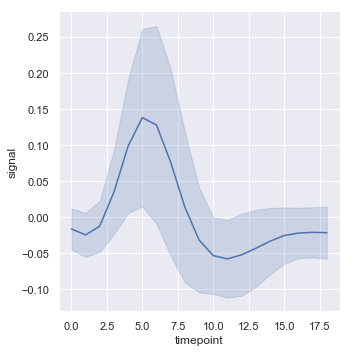

In [31]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

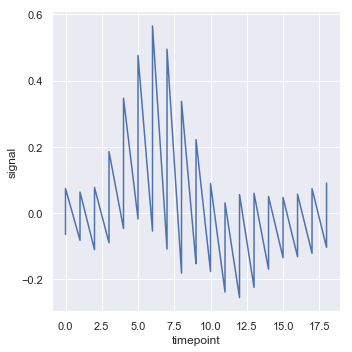

In [32]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

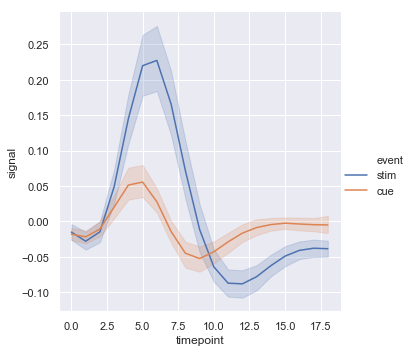

In [33]:
## Plotting subsets of data with semantic mappings
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

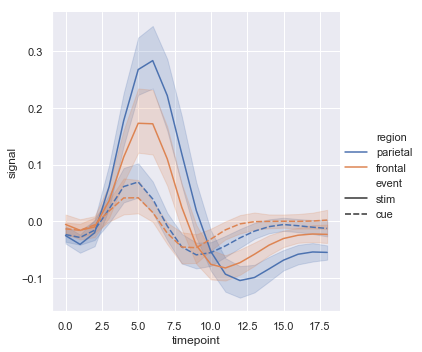

In [34]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

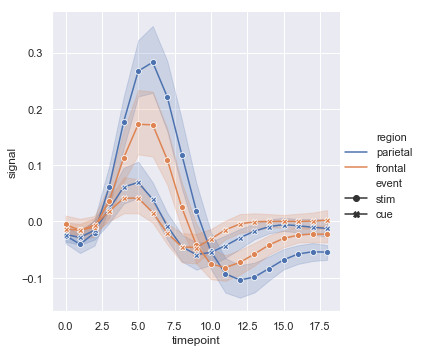

In [35]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

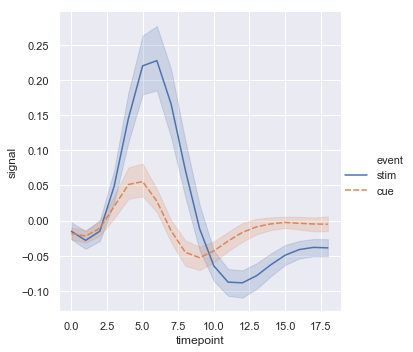

In [36]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

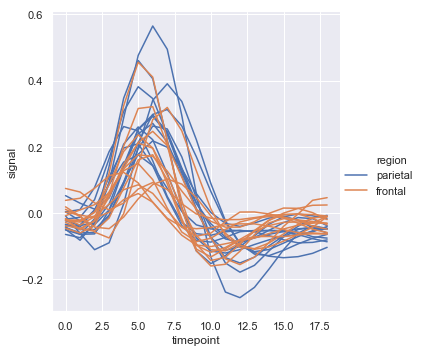

In [39]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

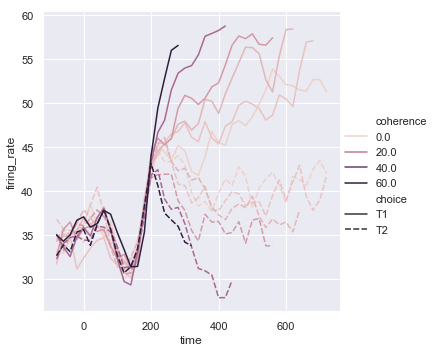

In [40]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

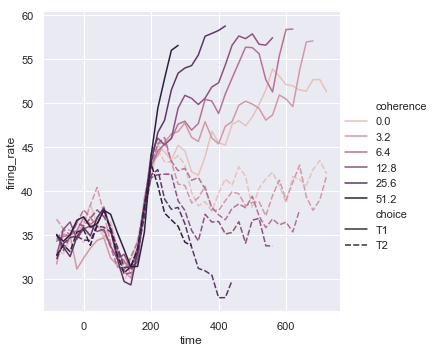

In [41]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

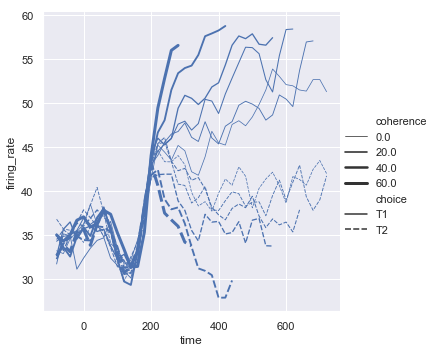

In [42]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

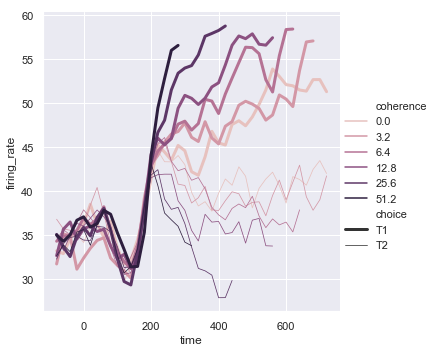

In [43]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

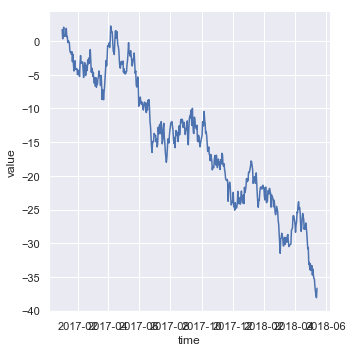

In [46]:
## date data

df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)


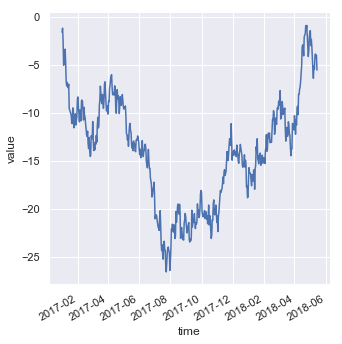

In [47]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

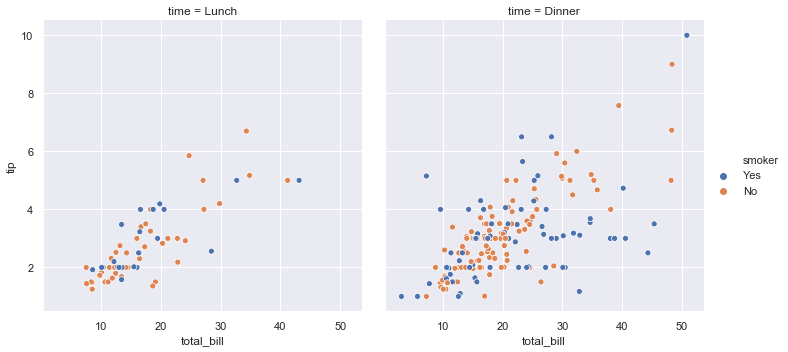

In [48]:
# multiple facets relationships

sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

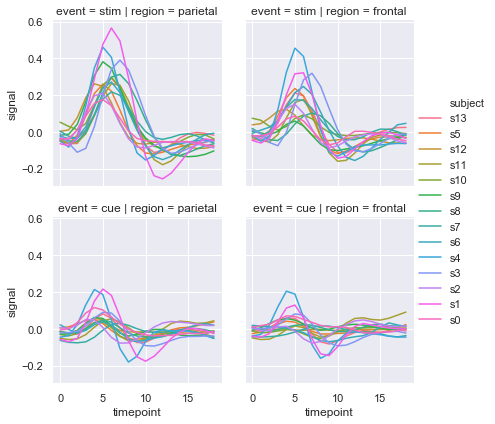

In [49]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

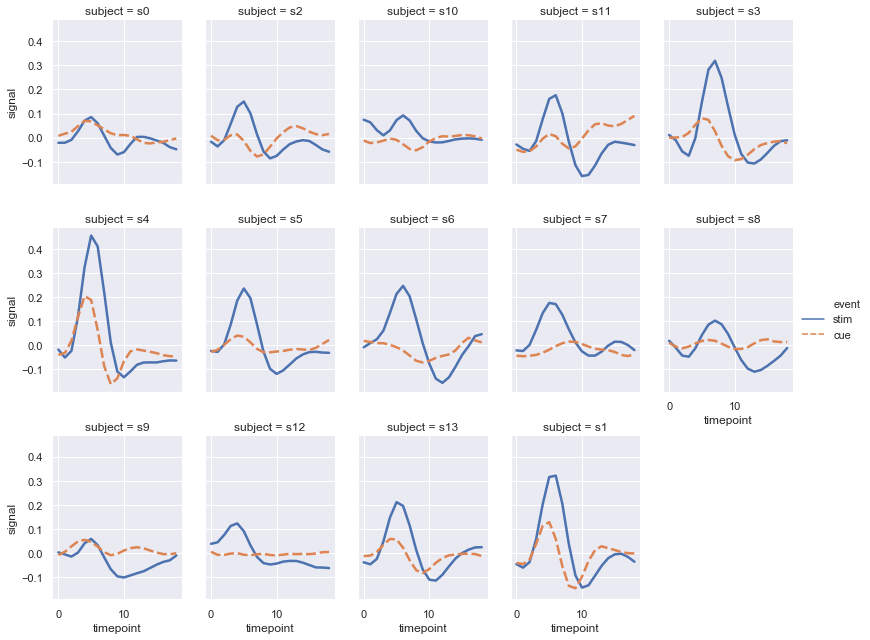

In [50]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));